In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import io

In [5]:
#Yes, the numbers are correct.

# Read and parse Table 1 data
table1_data = """X,X LOW,X HIGH,Q**2 [GEV**2],G1,stat +,stat -,sys +,sys -
0.017,0.014,0.02,1.2,-0.351,0.115,-0.115,0.11,-0.11
0.024,0.02,0.03,1.6,-0.374,0.071,-0.071,0.065,-0.065
0.035,0.03,0.04,2.0,-0.29,0.061,-0.061,0.039,-0.039
0.049,0.04,0.06,2.6,-0.204,0.04,-0.04,0.022,-0.022
0.081,0.06,0.1,4.4,-0.137,0.021,-0.021,0.016,-0.016
0.123,0.1,0.15,6.6,-0.108,0.015,-0.015,0.012,-0.012
0.173,0.15,0.2,8.2,-0.061,0.014,-0.014,0.009,-0.009
0.242,0.2,0.3,9.8,-0.042,0.011,-0.011,0.007,-0.007
0.342,0.3,0.4,11.7,-0.017,0.011,-0.011,0.005,-0.005
0.441,0.4,0.5,13.3,-0.007,0.011,-0.011,0.002,-0.002
0.564,0.5,0.7,15.0,0.003,0.008,-0.008,0.001,-0.001"""

# Read and parse Table 2 data
table2_data = """X,X LOW,X HIGH,G1,stat +,stat -,sys +,sys -
0.017,0.014,0.02,-0.497,0.163,-0.163,0.155,-0.155
0.024,0.02,0.03,-0.481,0.092,-0.092,0.083,-0.083
0.035,0.03,0.04,-0.345,0.073,-0.073,0.047,-0.047
0.049,0.04,0.06,-0.228,0.045,-0.045,0.025,-0.025
0.081,0.06,0.1,-0.139,0.022,-0.022,0.016,-0.016
0.123,0.1,0.15,-0.105,0.014,-0.014,0.012,-0.012
0.173,0.15,0.2,-0.06,0.014,-0.014,0.009,-0.009
0.242,0.2,0.3,-0.043,0.011,-0.011,0.007,-0.007
0.342,0.3,0.4,-0.018,0.013,-0.013,0.005,-0.005
0.441,0.4,0.5,-0.009,0.014,-0.014,0.003,-0.003
0.564,0.5,0.7,0.005,0.012,-0.012,0.002,-0.002"""

In [6]:
# Load data into DataFrames
df1 = pd.read_csv(io.StringIO(table1_data))
df2 = pd.read_csv(io.StringIO(table2_data))

In [7]:
# Calculate X as (X LOW + X HIGH) / 2
df1['X_calc'] = (df1['X LOW'] + df1['X HIGH']) / 2
df2['X_calc'] = (df2['X LOW'] + df2['X HIGH']) / 2

Table 1 Statistics:
X Bjorken range: 0.017 to 0.600
Q² range: 1.2 to 15.0 GeV²
G1 range: -0.374 to 0.003
Number of data points: 11

Table 2 Statistics:
X Bjorken range: 0.017 to 0.600
G1 range: -0.497 to 0.005
Number of data points: 11


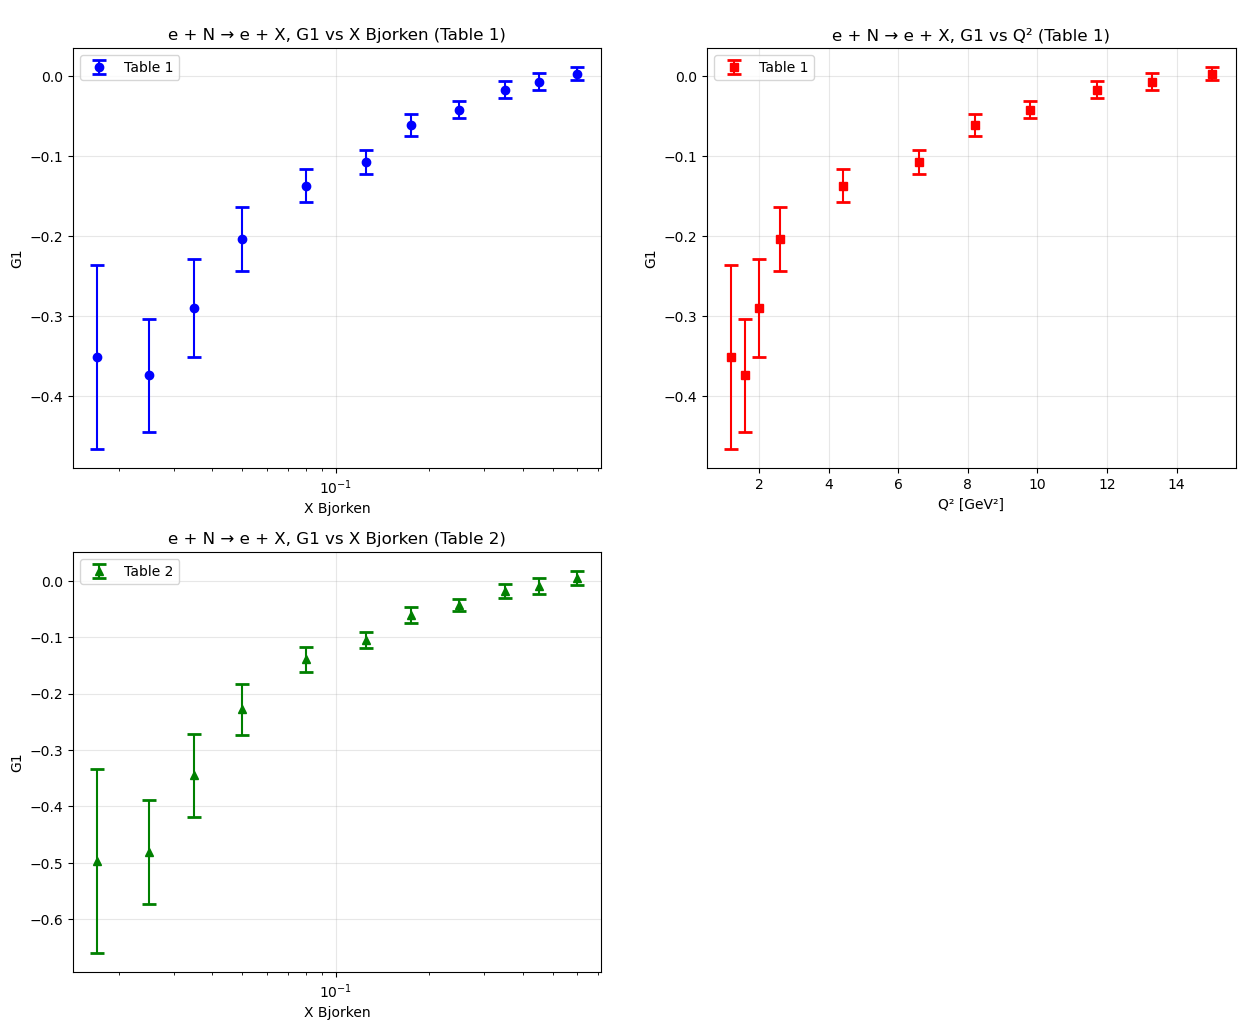

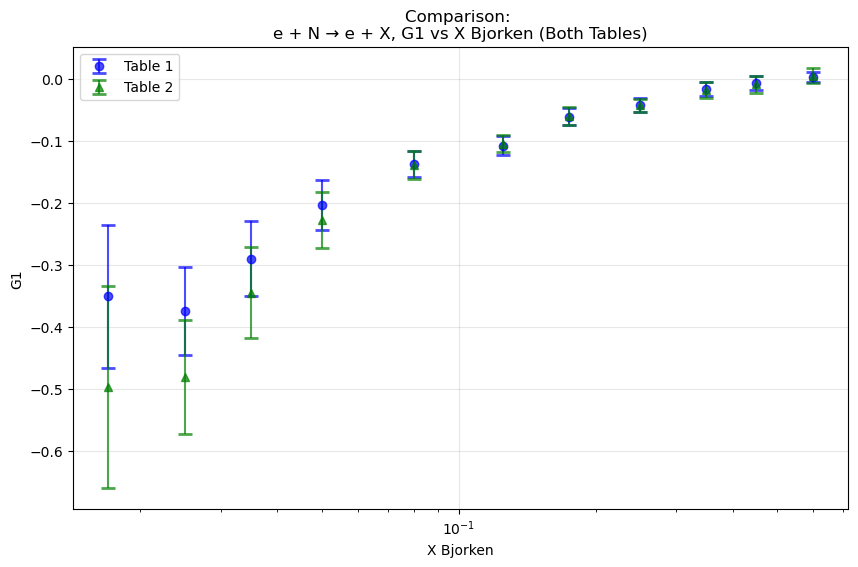

In [11]:
# Create figure with subplots
fig = plt.figure(figsize=(15, 12))

# Plot 1: G1 vs X for Table 1
ax1 = plt.subplot(2, 2, 1)
# Create asymmetric error bars
yerr_lower = abs(df1['stat -'])
yerr_upper = df1['stat +']
ax1.errorbar(df1['X_calc'], df1['G1'], 
             yerr=[yerr_lower, yerr_upper], 
             fmt='o', capsize=5, capthick=2, 
             label='Table 1', color='blue')
ax1.set_xlabel('X Bjorken')
ax1.set_ylabel('G1')
ax1.set_title('\ne + N → e + X, G1 vs X Bjorken (Table 1)')
ax1.set_xscale('log')
ax1.grid(True, alpha=0.3)
ax1.legend()

# Plot 2: G1 vs Q**2 for Table 1
ax2 = plt.subplot(2, 2, 2)
ax2.errorbar(df1['Q**2 [GEV**2]'], df1['G1'], 
             yerr=[yerr_lower, yerr_upper], 
             fmt='s', capsize=5, capthick=2, 
             label='Table 1', color='red')
ax2.set_xlabel('Q² [GeV²]')
ax2.set_ylabel('G1')
ax2.set_title('\ne + N → e + X, G1 vs Q² (Table 1)')
ax2.grid(True, alpha=0.3)
ax2.legend()

# Plot 3: G1 vs X for Table 2
ax3 = plt.subplot(2, 2, 3)
# Create asymmetric error bars for Table 2
yerr_lower_t2 = abs(df2['stat -'])
yerr_upper_t2 = df2['stat +']
ax3.errorbar(df2['X_calc'], df2['G1'], 
             yerr=[yerr_lower_t2, yerr_upper_t2], 
             fmt='^', capsize=5, capthick=2, 
             label='Table 2', color='green')
ax3.set_xlabel('X Bjorken')
ax3.set_ylabel('G1')
ax3.set_title('\ne + N → e + X, G1 vs X Bjorken (Table 2)')
ax3.set_xscale('log')
ax3.grid(True, alpha=0.3)
ax3.legend()

# Print some statistics about the data
print("Table 1 Statistics:")
print(f"X Bjorken range: {df1['X_calc'].min():.3f} to {df1['X_calc'].max():.3f}")
print(f"Q² range: {df1['Q**2 [GEV**2]'].min():.1f} to {df1['Q**2 [GEV**2]'].max():.1f} GeV²")
print(f"G1 range: {df1['G1'].min():.3f} to {df1['G1'].max():.3f}")
print(f"Number of data points: {len(df1)}")

print("\nTable 2 Statistics:")
print(f"X Bjorken range: {df2['X_calc'].min():.3f} to {df2['X_calc'].max():.3f}")
print(f"G1 range: {df2['G1'].min():.3f} to {df2['G1'].max():.3f}")
print(f"Number of data points: {len(df2)}")

# Additional comparison plot
fig2, ax = plt.subplots(figsize=(10, 6))
ax.errorbar(df1['X_calc'], df1['G1'], 
           yerr=[abs(df1['stat -']), df1['stat +']], 
           fmt='o', capsize=5, capthick=2, 
           label='Table 1', color='blue', alpha=0.7)
ax.errorbar(df2['X_calc'], df2['G1'], 
           yerr=[abs(df2['stat -']), df2['stat +']], 
           fmt='^', capsize=5, capthick=2, 
           label='Table 2', color='green', alpha=0.7)
ax.set_xlabel('X Bjorken')
ax.set_ylabel('G1')
ax.set_title('Comparison: \ne + N → e + X, G1 vs X Bjorken (Both Tables)')
ax.set_xscale('log')
ax.grid(True, alpha=0.3)
ax.legend()
plt.show()